In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [2]:
df=pd.read_excel('health.xlsx', sheet_name='HPredict')

In [3]:
df

P.No.     Conclusion1                  Name    Test Date  Year  Cycle  \
0     306708     Best Health       Shyamjee Prasad  21-Jan-2017  2016      1   
1     306833  Average Health          Sanjay Kumar  30-Sep-2016  2016      1   
2     398450     Best Health         Nishith Kundu  23-Jul-2016  2016      1   
3     398564     Best Health           Kumod Kumar  18-Jan-2017  2016      1   
4     398600  Average Health          Balram Kumar  29-Jul-2016  2016      1   
...      ...             ...                   ...          ...   ...    ...   
1775  389122     Best Health            Ajay Kumar  05-Nov-2019  2019      1   
1776  382936     Best Health    Shyam Sundra Singh  26-Apr-2019  2019      1   
1777  381539  Average Health            Aslam Khan  03-Jul-2019  2019      1   
1778  390310     Best Health            Kausik Sen  19-Jul-2019  2019      1   
1779  389265     Best Health  Jitendra Kumar Yadav  28-Aug-2019  2019      1   

     Gender  Age  Height  Weight  ... TMT Remarks  \
0      Male   44   180.0      83  ...         NaN   
1      Male   43   169.0      72  ...         NaN   
2      Male   31   180.0      73  ...         NaN   
3      Male   33   172.0      75  ...         NaN   
4      Male   27   173.0      84  ...         NaN   
...     ...  ...     ...     ...  ...         ...   
1775   Male   40   177.0      78  ...         NaN   
1776   Male   50   177.0      72  ...         NaN   
1777   Male   55   167.0      80  ...         NaN   
1778   Male   42   169.0      69  ...         NaN   
1779   Male   37   175.0      70  ...         NaN   

      Systematic Examination Remarks    Grade                     Area  \
0                                NaN      E-4         CX - Chasis Assy   
1                                NaN      E-6         Chassis Assembly   
2                                NaN  Level 6     Mech. Maint. (Truck)   
3                                NaN  Level 6  Chassis Assembly Line 1   
4                                NaN  Level 6     Mech. Maint. (Truck)   
...                              ...      ...                      ...   
1775                             NaN      E-4         CX - Chasis Assy   
1776                             NaN      E-2      Prod   Ctrl (Truck)   
1777  PTCA done/ Adv. to see in MOPD      E-2         CX - Chasis Assy   
1778                    BP RECHECKUP      E-3   Vehicle Factory Maint.   
1779                             NaN      E-4  Chassis Assembly Line 1   

           Phone                         Email Unnamed: 51 Unnamed: 52  \
0     7970480859                           NaN         NaN         NaN   
1     8092730508                           NaN         NaN         NaN   
2     7209200418  NISHITH.KUNDU@TATAMOTORS.COM         NaN         NaN   
3     8603169271    KUMOD.KUMAR@TATAMOTORS.COM         NaN         NaN   
4     9006690672   BALRAM.KUMAR@TATAMOTORS.COM         NaN         NaN   
...          ...                           ...         ...         ...   
1775  9279215589                           NaN         NaN         NaN   
1776  9955218232                           NaN         NaN         NaN   
1777  7061590924                           NaN         NaN         NaN   
1778  8797943139                           NaN         NaN         NaN   
1779  9234897941                           NaN         NaN         NaN   

      Unnamed: 53 Unnamed: 54  
0             NaN         NaN  
1             NaN         NaN  
2             NaN         NaN  
3             NaN         NaN  
4             NaN         NaN  
...           ...         ...  
1775          NaN         NaN  
1776          NaN         NaN  
1777          NaN         NaN  
1778          NaN         NaN  
1779          NaN         NaN  

[1780 rows x 55 columns]

<AxesSubplot:>

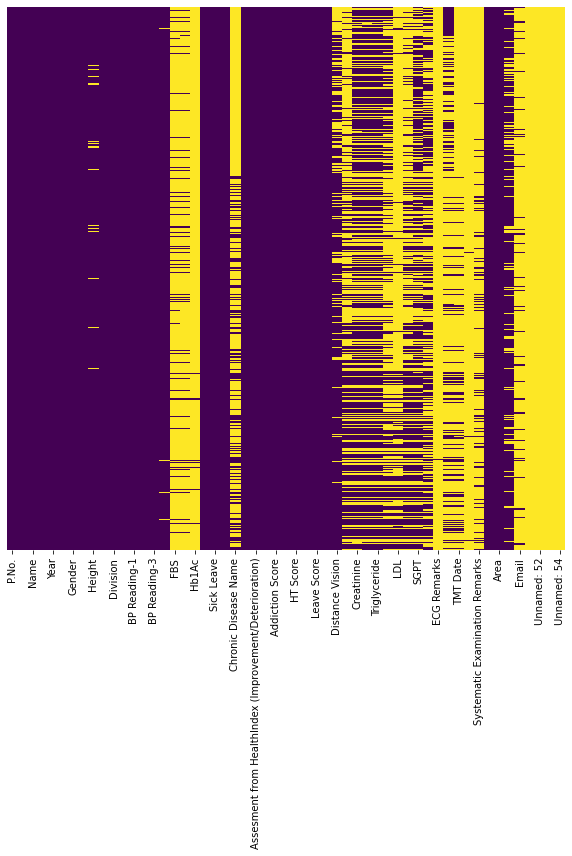

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df.drop(['P.No.','Cycle','Name','Test Date','Year','Systematic Examination Remarks','Grade','Phone','Email','Division','BP Reading-2','BP Reading-3','FBS','PPBS','Hb1Ac','Chronic Disease Name','Distance Vision','LDL','ECG Remarks','TMT Date','TMT Remarks','HealthIndex Score','Assesment from HealthIndex (Improvement/Deterioration)','Addiction Score','BMI Score','HT Score','DBT Score','Leave Score','Chronic Score','ECG','TMT Status','Urea','SGOT','HDL'], axis=1, inplace=True)

<AxesSubplot:>

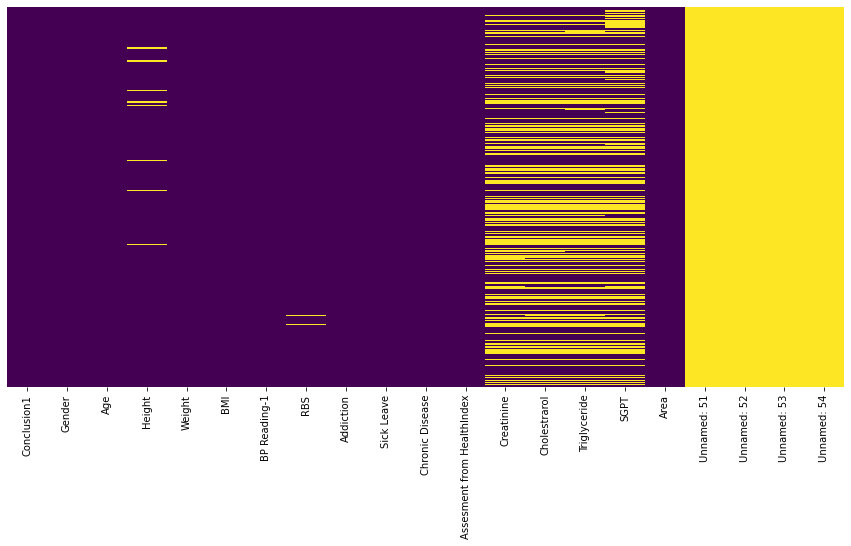

In [6]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df.drop(['Unnamed: 51', 'Unnamed: 52','Unnamed: 53', 'Unnamed: 54'], axis=1, inplace=True)

<AxesSubplot:>

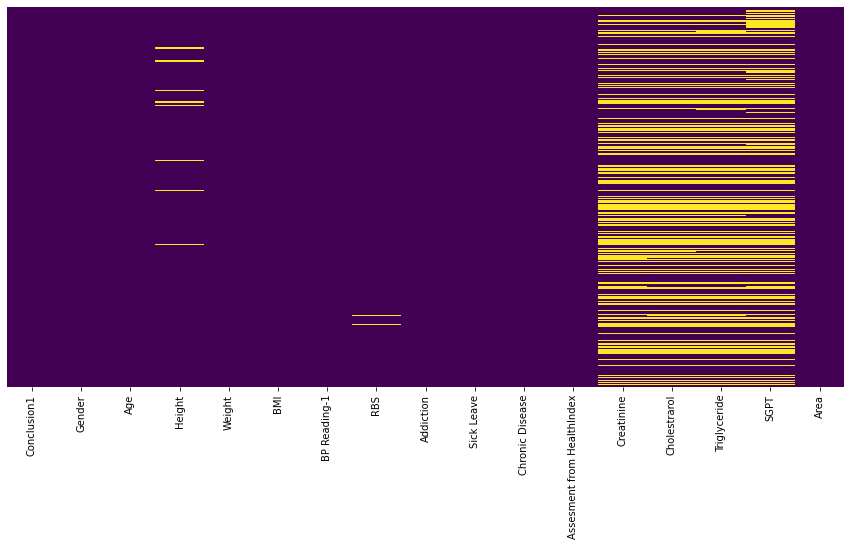

In [8]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df.columns

Index(['Conclusion1', 'Gender', 'Age', 'Height', 'Weight', 'BMI',
       'BP Reading-1', 'RBS', 'Addiction', 'Sick Leave', 'Chronic Disease',
       'Assesment from HealthIndex', 'Creatinine', 'Cholestrarol',
       'Triglyceride', 'SGPT', 'Area'],
      dtype='object')

In [10]:
df.head()

Conclusion1 Gender  Age  Height  Weight    BMI BP Reading-1    RBS  \
0     Best Health   Male   44   180.0      83  25.06       130/80   84.0   
1  Average Health   Male   43   169.0      72  25.21      170/110  116.0   
2     Best Health   Male   31   180.0      73  21.80       110/80   88.0   
3     Best Health   Male   33   172.0      75  25.35       110/70   93.0   
4  Average Health   Male   27   173.0      84  29.07       120/80  101.0   

  Addiction  Sick Leave Chronic Disease Assesment from HealthIndex Creatinine  \
0         Y         0.0               N             Average Health          1   
1         N         4.0               N                Best Health          1   
2         N         0.0               N                Best Health        NaN   
3         N        10.0               N                Best Health        0.9   
4         N        15.0               N             Average Health        1.1   

  Cholestrarol Triglyceride SGPT                     Area  
0          NaN          NaN  NaN         CX - Chasis Assy  
1          218          153  NaN         Chassis Assembly  
2          NaN          NaN  NaN     Mech. Maint. (Truck)  
3          162           69   54  Chassis Assembly Line 1  
4          136           86  NaN     Mech. Maint. (Truck)

In [11]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)
df.drop_duplicates(inplace=True)
ndups = df.duplicated()
print('Number of duplicate rows = %d' % (ndups.sum()))
print(df.shape)

Number of duplicate rows = 1
(1780, 17)
Number of duplicate rows = 0
(1779, 17)


In [12]:
df.Area.value_counts(normalize=True)

CX - Chasis Assy                        0.321529
Chassis Assembly Line 1                 0.205734
Chassis Assembly                        0.174255
Rec. (Normal/Exp. Ch                    0.110174
Vehicle Factory Maint.                  0.030354
Vehicle Testing                         0.026981
Vehicle Preparation                     0.017988
Mech. Maint. (Truck)                    0.014053
Prod   Ctrl (Truck)                     0.012929
Chassis Assembly -II                    0.011242
Trainees (Employees                     0.010680
Elect. Maint. (Truck                    0.010118
Engine Assy Long Block Assembly         0.007307
Silencer & Small Par                    0.005621
Prod Ctrl (Cab&Cowl)                    0.005621
Chassis Assy Line-4                     0.005059
FPIG                                    0.003935
Rectification Painti                    0.003935
Production Inspectio                    0.003373
Mfg. QA (Veh Fact)                      0.002248
Beta proto Shop     

In [13]:
 print(df.Area.unique())

['CX - Chasis Assy' 'Chassis Assembly' 'Mech. Maint. (Truck)'
 'Chassis Assembly Line 1' 'Elect. Maint. (Truck' 'Rec. (Normal/Exp. Ch'
 'Chassis Assembly -II' 'Vehicle Factory Maint.' 'CX - Frame Shop'
 'Vehicle Preparation' 'Production Inspectio' 'Vehicle Testing'
 'Rectification Painti' 'Chassis Assy Line-4' 'Prod   Ctrl (Truck)'
 'Beta proto Shop' 'Silencer & Small Par' 'Product Line Operations'
 'Maintenance & Planning' 'Engine Assy Long Block Assembly'
 'Prod Ctrl (Cab&Cowl)' 'Paint Shop  (Frame)' 'PPL & Order Fulfilment'
 'Experimental Shop-JSPR' 'Mech. Maint.(Truck-P' 'Engine Testing'
 'Mfg. QA (Veh Fact)' 'CX - Trim Line' 'FPIG'
 'Frame Assy. (Rivetti Frame Assy 1' 'Trainees (Employees'
 'Vehicle storage (Off' 'Electrical Maint (Tr' 'Maintenance'
 'Jamshedpur CV Works' 'Production Control (Prima & A/L-III)'
 'EOL & Care Line' 'Vehicle Factory' 'Synchro Soft - Swaging'
 'Paint Mixing (Auto)']


In [14]:
df.Area=pd.Categorical(df.Area,{'CX - Chasis Assy','Chassis Assembly','Mech. Maint. (Truck)','Chassis Assembly Line 1','Elect. Maint. (Truck','Rec. (Normal/Exp. Ch','Chassis Assembly -II','Vehicle Factory Maint.','CX - Frame Shop','Vehicle Preparation','Production Inspectio','Vehicle Testing','Rectification Painti','Chassis Assy Line-4','Prod   Ctrl (Truck)','Beta proto Shop','Silencer & Small Par','Product Line Operations','Maintenance & Planning','Engine Assy Long Block Assembly','Prod Ctrl (Cab&Cowl)','Paint Shop  (Frame)','PPL & Order Fulfilment','Experimental Shop-JSPR','Mech. Maint.(Truck-P','Engine Testing','Mfg. QA (Veh Fact)','CX - Trim Line','FPIG','Frame Assy. (Rivetti Frame Assy 1','Trainees (Employees','Vehicle storage (Off','Electrical Maint (Tr','Maintenance','Jamshedpur CV Works','Production Control (Prima & A/L-III)','EOL & Care Line','Vehicle Factory','Synchro Soft - Swaging','Paint Mixing (Auto)'},ordered=True)
df.Area

0              CX - Chasis Assy
1              Chassis Assembly
2          Mech. Maint. (Truck)
3       Chassis Assembly Line 1
4          Mech. Maint. (Truck)
                 ...           
1775           CX - Chasis Assy
1776        Prod   Ctrl (Truck)
1777           CX - Chasis Assy
1778     Vehicle Factory Maint.
1779    Chassis Assembly Line 1
Name: Area, Length: 1779, dtype: category
Categories (40, object): ['Synchro Soft - Swaging' < 'Vehicle Factory Maint.' < 'Mech. Maint. (Truck)' < 'Vehicle Preparation' ... 'Vehicle Testing' < 'CX - Chasis Assy' < 'Silencer & Small Par' < 'Prod Ctrl (Cab&Cowl)']

In [15]:
df.Area=df.Area.cat.codes
df.Area 

0       37
1        7
2        2
3       12
4        2
        ..
1775    37
1776     6
1777    37
1778     1
1779    12
Name: Area, Length: 1779, dtype: int8

In [16]:
df.Gender=pd.Categorical(df.Gender,{'Male','Female'},ordered=True)
df.Gender=df.Gender.cat.codes
df.Gender #MALE=1,FEMALE=0

0       1
1       1
2       1
3       1
4       1
       ..
1775    1
1776    1
1777    1
1778    1
1779    1
Name: Gender, Length: 1779, dtype: int8

In [17]:
df.Addiction=pd.Categorical(df.Addiction,{'Y','N'},ordered=True)
df.Addiction=df.Addiction.cat.codes
df.Addiction  #Y=0,N=1

0       0
1       1
2       1
3       1
4       1
       ..
1775    1
1776    1
1777    1
1778    1
1779    1
Name: Addiction, Length: 1779, dtype: int8

In [18]:
df.rename(columns={'Chronic Disease':'Chronic_Disease'},inplace=True)
df.Chronic_Disease=pd.Categorical(df.Chronic_Disease,{'Y','N'},ordered=True)
df.Chronic_Disease=df.Chronic_Disease.cat.codes
df.Chronic_Disease #Y=0,N=1

0       1
1       1
2       1
3       1
4       1
       ..
1775    1
1776    1
1777    0
1778    1
1779    1
Name: Chronic_Disease, Length: 1779, dtype: int8

In [19]:
# print(df.shape)

# for column in df.columns:
#     df.drop(index = df[df[column] == 'nil'].index,inplace=True)

# print(df.shape)

In [20]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [21]:
df.rename(columns={'BP Reading-1':'BP'},inplace=True)
df['SBP']=np.nan
df['DBP']=np.nan
df[['SBP','DBP']]=df['BP'].str.split('/',expand=True)
df.drop(['BP'],axis=1,inplace=True)

In [22]:
df.rename(columns={'Assesment from HealthIndex':'Conclusion'},inplace=True)
df.Conclusion=pd.Categorical(df.Conclusion,{'Best Health','Average Health','Poor Health'},ordered=True)
df.Conclusion=df.Conclusion.cat.codes
df.Conclusion #AverageHealth=1, BestHealth=0, PoorHealth=2

0       0
1       1
2       1
3       1
4       0
       ..
1774    1
1775    1
1776    1
1777    1
1778    1
Name: Conclusion, Length: 1779, dtype: int8

In [23]:
df

Conclusion1  Gender  Age  Height  Weight    BMI    RBS  Addiction  \
0        Best Health       1   44   180.0      83  25.06   84.0          0   
1     Average Health       1   43   169.0      72  25.21  116.0          1   
2        Best Health       1   31   180.0      73  21.80   88.0          1   
3        Best Health       1   33   172.0      75  25.35   93.0          1   
4     Average Health       1   27   173.0      84  29.07  101.0          1   
...              ...     ...  ...     ...     ...    ...    ...        ...   
1774     Best Health       1   40   177.0      78  24.90  125.0          1   
1775     Best Health       1   50   177.0      72  22.98  103.0          1   
1776  Average Health       1   55   167.0      80  28.69  129.0          1   
1777     Best Health       1   42   169.0      69  24.16  128.0          1   
1778     Best Health       1   37   175.0      70  22.86   88.0          1   

      Sick Leave  Chronic_Disease  Conclusion Creatinine Cholestrarol  \
0            0.0                1           0          1          NaN   
1            4.0                1           1          1          218   
2            0.0                1           1        NaN          NaN   
3           10.0                1           1        0.9          162   
4           15.0                1           0        1.1          136   
...          ...              ...         ...        ...          ...   
1774         0.0                1           1        NaN          NaN   
1775         0.0                1           1          1          127   
1776         8.0                0           1        NaN          148   
1777         0.0                1           1        NaN          NaN   
1778         0.0                1           1        0.8          179   

     Triglyceride SGPT  Area  SBP  DBP  
0             NaN  NaN    37  130   80  
1             153  NaN     7  170  110  
2             NaN  NaN     2  110   80  
3              69   54    12  110   70  
4              86  NaN     2  120   80  
...           ...  ...   ...  ...  ...  
1774          NaN  NaN    37  130   80  
1775           91   45     6  140   80  
1776          116  NaN    37  130   80  
1777          NaN  NaN     1  110   70  
1778          123   29    12  110   80  

[1779 rows x 18 columns]

In [24]:
#df.drop(['level_0'],axis=1,inplace=True)

In [25]:
df.rename(columns={'Sick Leave':'Sick_L'},inplace=True)

In [26]:
df

Conclusion1  Gender  Age  Height  Weight    BMI    RBS  Addiction  \
0        Best Health       1   44   180.0      83  25.06   84.0          0   
1     Average Health       1   43   169.0      72  25.21  116.0          1   
2        Best Health       1   31   180.0      73  21.80   88.0          1   
3        Best Health       1   33   172.0      75  25.35   93.0          1   
4     Average Health       1   27   173.0      84  29.07  101.0          1   
...              ...     ...  ...     ...     ...    ...    ...        ...   
1774     Best Health       1   40   177.0      78  24.90  125.0          1   
1775     Best Health       1   50   177.0      72  22.98  103.0          1   
1776  Average Health       1   55   167.0      80  28.69  129.0          1   
1777     Best Health       1   42   169.0      69  24.16  128.0          1   
1778     Best Health       1   37   175.0      70  22.86   88.0          1   

      Sick_L  Chronic_Disease  Conclusion Creatinine Cholestrarol  \
0        0.0                1           0          1          NaN   
1        4.0                1           1          1          218   
2        0.0                1           1        NaN          NaN   
3       10.0                1           1        0.9          162   
4       15.0                1           0        1.1          136   
...      ...              ...         ...        ...          ...   
1774     0.0                1           1        NaN          NaN   
1775     0.0                1           1          1          127   
1776     8.0                0           1        NaN          148   
1777     0.0                1           1        NaN          NaN   
1778     0.0                1           1        0.8          179   

     Triglyceride SGPT  Area  SBP  DBP  
0             NaN  NaN    37  130   80  
1             153  NaN     7  170  110  
2             NaN  NaN     2  110   80  
3              69   54    12  110   70  
4              86  NaN     2  120   80  
...           ...  ...   ...  ...  ...  
1774          NaN  NaN    37  130   80  
1775           91   45     6  140   80  
1776          116  NaN    37  130   80  
1777          NaN  NaN     1  110   70  
1778          123   29    12  110   80  

[1779 rows x 18 columns]

In [27]:
df['RBS'] = df['RBS'].fillna(value=df['RBS'].median())

In [28]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 'v'].index,inplace=True)

print(df.shape)

(1779, 18)
(1778, 18)


In [29]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 'Nil'].index,inplace=True)

print(df.shape)

(1778, 18)
(1771, 18)


In [30]:
# print(df.shape)

# for column in df.columns:
#     df.drop(index = df[df[column] == '0.9q'].index,inplace=True)

# print(df.shape)

In [31]:
# print(df.shape)

# for column in df.columns:
#     df.drop(index = df[df[column] == '-1'].index,inplace=True)

# print(df.shape)

In [32]:
df['Triglyceride'] = df['Triglyceride'].fillna(value=df['Triglyceride'].median())
df['SGPT'] = df['SGPT'].fillna(value=df['SGPT'].median())
df['Cholestrarol'] = df['Cholestrarol'].fillna(value=df['Cholestrarol'].median())
df['Creatinine'] = df['Creatinine'].fillna(value=df['Creatinine'].median())
df['Area'] = df['Area'].fillna(value=df['Area'].median())

In [33]:
df

Conclusion1  Gender  Age  Height  Weight    BMI    RBS  Addiction  \
0        Best Health       1   44   180.0      83  25.06   84.0          0   
1     Average Health       1   43   169.0      72  25.21  116.0          1   
2        Best Health       1   31   180.0      73  21.80   88.0          1   
3        Best Health       1   33   172.0      75  25.35   93.0          1   
4     Average Health       1   27   173.0      84  29.07  101.0          1   
...              ...     ...  ...     ...     ...    ...    ...        ...   
1774     Best Health       1   40   177.0      78  24.90  125.0          1   
1775     Best Health       1   50   177.0      72  22.98  103.0          1   
1776  Average Health       1   55   167.0      80  28.69  129.0          1   
1777     Best Health       1   42   169.0      69  24.16  128.0          1   
1778     Best Health       1   37   175.0      70  22.86   88.0          1   

      Sick_L  Chronic_Disease  Conclusion Creatinine Cholestrarol  \
0        0.0                1           0          1        163.0   
1        4.0                1           1          1          218   
2        0.0                1           1        0.9        163.0   
3       10.0                1           1        0.9          162   
4       15.0                1           0        1.1          136   
...      ...              ...         ...        ...          ...   
1774     0.0                1           1        0.9        163.0   
1775     0.0                1           1          1          127   
1776     8.0                0           1        0.9          148   
1777     0.0                1           1        0.9        163.0   
1778     0.0                1           1        0.8          179   

      Triglyceride  SGPT  Area  SBP  DBP  
0            153.0  29.0    37  130   80  
1            153.0  29.0     7  170  110  
2            153.0  29.0     2  110   80  
3             69.0  54.0    12  110   70  
4             86.0  29.0     2  120   80  
...            ...   ...   ...  ...  ...  
1774         153.0  29.0    37  130   80  
1775          91.0  45.0     6  140   80  
1776         116.0  29.0    37  130   80  
1777         153.0  29.0     1  110   70  
1778         123.0  29.0    12  110   80  

[1771 rows x 18 columns]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1771 entries, 0 to 1778
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Conclusion1      1771 non-null   object 
 1   Gender           1771 non-null   int8   
 2   Age              1771 non-null   int64  
 3   Height           1720 non-null   float64
 4   Weight           1771 non-null   int64  
 5   BMI              1771 non-null   float64
 6   RBS              1771 non-null   float64
 7   Addiction        1771 non-null   int8   
 8   Sick_L           1769 non-null   float64
 9   Chronic_Disease  1771 non-null   int8   
 10  Conclusion       1771 non-null   int8   
 11  Creatinine       1771 non-null   object 
 12  Cholestrarol     1771 non-null   object 
 13  Triglyceride     1771 non-null   float64
 14  SGPT             1771 non-null   float64
 15  Area             1771 non-null   int8   
 16  SBP              1771 non-null   object 
 17  DBP           

In [35]:
df["SBP"] = pd.to_numeric(df["SBP"], downcast="integer")
df["DBP"] = pd.to_numeric(df["DBP"], downcast="integer")
df["Creatinine"] = pd.to_numeric(df["Creatinine"], downcast="integer")
df["Cholestrarol"] = pd.to_numeric(df["Cholestrarol"], downcast="integer")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1771 entries, 0 to 1778
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Conclusion1      1771 non-null   object 
 1   Gender           1771 non-null   int8   
 2   Age              1771 non-null   int64  
 3   Height           1720 non-null   float64
 4   Weight           1771 non-null   int64  
 5   BMI              1771 non-null   float64
 6   RBS              1771 non-null   float64
 7   Addiction        1771 non-null   int8   
 8   Sick_L           1769 non-null   float64
 9   Chronic_Disease  1771 non-null   int8   
 10  Conclusion       1771 non-null   int8   
 11  Creatinine       1771 non-null   float64
 12  Cholestrarol     1771 non-null   float64
 13  Triglyceride     1771 non-null   float64
 14  SGPT             1771 non-null   float64
 15  Area             1771 non-null   int8   
 16  SBP              1770 non-null   float64
 17  DBP           

In [37]:
df.Conclusion1=pd.Categorical(df.Conclusion1,{'Best Health','Average Health','Poor Health'},ordered=True)
df.Conclusion1=df.Conclusion1.cat.codes
df.Conclusion1 #AverageHealth=1, BestHealth=0, PoorHealth=2

0       1
1       0
2       1
3       1
4       0
       ..
1774    1
1775    1
1776    0
1777    1
1778    1
Name: Conclusion1, Length: 1771, dtype: int8

In [38]:
df['Result'] = df.Conclusion
df.drop(['Conclusion'],axis=1,inplace=True)

In [39]:
df['Result1'] = df.Conclusion1
df.drop(['Conclusion1'],axis=1,inplace=True)

In [40]:
df.head()

Gender  Age  Height  Weight    BMI    RBS  Addiction  Sick_L  \
0       1   44   180.0      83  25.06   84.0          0     0.0   
1       1   43   169.0      72  25.21  116.0          1     4.0   
2       1   31   180.0      73  21.80   88.0          1     0.0   
3       1   33   172.0      75  25.35   93.0          1    10.0   
4       1   27   173.0      84  29.07  101.0          1    15.0   

   Chronic_Disease  Creatinine  Cholestrarol  Triglyceride  SGPT  Area    SBP  \
0                1         1.0         163.0         153.0  29.0    37  130.0   
1                1         1.0         218.0         153.0  29.0     7  170.0   
2                1         0.9         163.0         153.0  29.0     2  110.0   
3                1         0.9         162.0          69.0  54.0    12  110.0   
4                1         1.1         136.0          86.0  29.0     2  120.0   

     DBP  Result  Result1  
0   80.0       0        1  
1  110.0       1        0  
2   80.0       1        1  
3   70.0       1        1  
4   80.0       0        0

In [41]:
df.corr()

Gender       Age    Height    Weight       BMI       RBS  \
Gender           1.000000 -0.005459  0.132091  0.037789 -0.054336  0.018989   
Age             -0.005459  1.000000 -0.172092 -0.090812 -0.019608  0.138651   
Height           0.132091 -0.172092  1.000000  0.475391  0.004809 -0.052568   
Weight           0.037789 -0.090812  0.475391  1.000000  0.863826  0.004332   
BMI             -0.054336 -0.019608  0.004809  0.863826  1.000000  0.037712   
RBS              0.018989  0.138651 -0.052568  0.004332  0.037712  1.000000   
Addiction        0.024124 -0.105273  0.005479 -0.065435 -0.076427 -0.153184   
Sick_L           0.027408  0.024270  0.004520  0.033454  0.048515  0.060059   
Chronic_Disease -0.024242 -0.112612 -0.017297 -0.001693 -0.002644 -0.047068   
Creatinine       0.029356 -0.001087  0.030291  0.072251  0.063508 -0.027485   
Cholestrarol    -0.022465 -0.006735  0.025079  0.006727 -0.013678  0.040175   
Triglyceride    -0.007885 -0.025067  0.034227  0.078028  0.065076  0.025187   
SGPT             0.020784 -0.165324  0.026978  0.117427  0.116304  0.010058   
Area            -0.006898  0.072238 -0.050702 -0.022582 -0.002906  0.032572   
SBP              0.024196  0.251937 -0.078595  0.087203  0.137737  0.205743   
DBP              0.029030  0.129399 -0.041058  0.113038  0.140941  0.114992   
Result           0.025393 -0.085858  0.008806 -0.141235 -0.162170 -0.115772   
Result1          0.014512 -0.117146  0.022679 -0.145480 -0.176949 -0.108034   

                 Addiction    Sick_L  Chronic_Disease  Creatinine  \
Gender            0.024124  0.027408        -0.024242    0.029356   
Age              -0.105273  0.024270        -0.112612   -0.001087   
Height            0.005479  0.004520        -0.017297    0.030291   
Weight           -0.065435  0.033454        -0.001693    0.072251   
BMI              -0.076427  0.048515        -0.002644    0.063508   
RBS              -0.153184  0.060059        -0.047068   -0.027485   
Addiction         1.000000 -0.160251         0.213428    0.009006   
Sick_L           -0.160251  1.000000        -0.138725   -0.009791   
Chronic_Disease   0.213428 -0.138725         1.000000   -0.002680   
Creatinine        0.009006 -0.009791        -0.002680    1.000000   
Cholestrarol      0.007878  0.016908        -0.010324    0.028646   
Triglyceride      0.019283  0.025529        -0.054593    0.023439   
SGPT              0.031899 -0.011418         0.018469   -0.015028   
Area              0.023486 -0.067877         0.049758    0.044541   
SBP              -0.184818  0.047381         0.008376    0.017638   
DBP              -0.135976  0.017951        -0.021378    0.037087   
Result            0.273608 -0.073024         0.080707    0.012974   
Result1           0.114374 -0.043764         0.042357   -0.051014   

                 Cholestrarol  Triglyceride      SGPT      Area       SBP  \
Gender              -0.022465     -0.007885  0.020784 -0.006898  0.024196   
Age                 -0.006735     -0.025067 -0.165324  0.072238  0.251937   
Height               0.025079      0.034227  0.026978 -0.050702 -0.078595   
Weight               0.006727      0.078028  0.117427 -0.022582  0.087203   
BMI                 -0.013678      0.065076  0.116304 -0.002906  0.137737   
RBS                  0.040175      0.025187  0.010058  0.032572  0.205743   
Addiction            0.007878      0.019283  0.031899  0.023486 -0.184818   
Sick_L               0.016908      0.025529 -0.011418 -0.067877  0.047381   
Chronic_Disease     -0.010324     -0.054593  0.018469  0.049758  0.008376   
Creatinine           0.028646      0.023439 -0.015028  0.044541  0.017638   
Cholestrarol         1.000000      0.391197  0.048588 -0.029994  0.022611   
Triglyceride         0.391197      1.000000  0.124828  0.029405 -0.013818   
SGPT                 0.048588      0.124828  1.000000  0.010868 -0.016280   
Area                -0.029994      0.029405  0.010868  1.000000 -0.000105   
SBP                  0.022611     -0.013818 -0.016

In [42]:
df.Gender.value_counts()

1    1756
0      15
Name: Gender, dtype: int64

In [43]:
df.Area.value_counts()

37    567
12    366
7     309
27    196
1      53
36     48
3      32
2      24
6      23
29     20
15     19
4      18
26     13
38     10
39     10
9       9
16      7
19      7
13      6
30      4
14      4
8       3
22      3
10      2
34      2
5       2
35      1
33      1
32      1
31      1
0       1
28      1
25      1
24      1
23      1
21      1
18      1
17      1
11      1
20      1
Name: Area, dtype: int64

<AxesSubplot:>

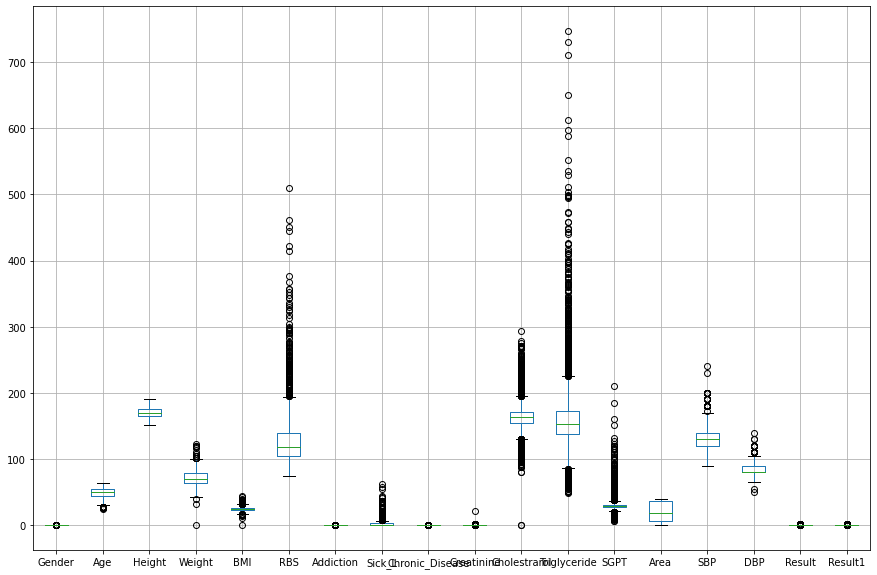

In [44]:
plt.figure(figsize=(15,10))
df.boxplot()

In [45]:
#df.SBP.max()

In [46]:
# print(df.shape)

# for column in df.columns:
#     df.drop(index = df[df[column] == 14080].index,inplace=True)

# print(df.shape)

In [47]:
# df.BMI.max()

In [48]:
# print(df.shape)

# for column in df.columns:
#     df.drop(index = df[df[column] == 2837.37].index,inplace=True)

# print(df.shape)

In [49]:
df.Triglyceride.max()

747.0

In [50]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 747].index,inplace=True)

print(df.shape)

(1771, 18)
(1770, 18)


In [51]:
df.Triglyceride.max()

730.0

In [52]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 730].index,inplace=True)

print(df.shape)

(1770, 18)
(1769, 18)


In [53]:
df.Triglyceride.max()

710.0

In [54]:
print(df.shape)

for column in df.columns:
    df.drop(index = df[df[column] == 710].index,inplace=True)

print(df.shape)

(1769, 18)
(1768, 18)


<AxesSubplot:>

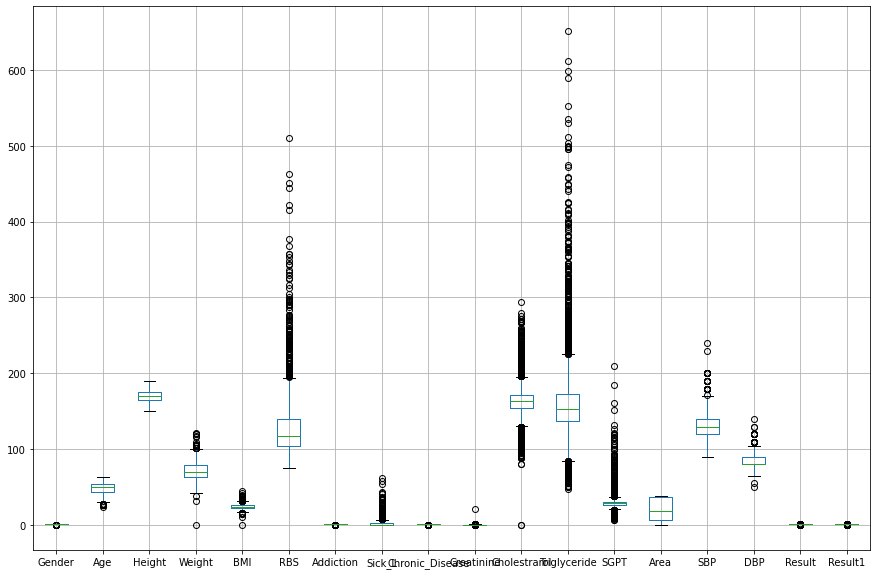

In [55]:
plt.figure(figsize=(15,10))
df.boxplot()

<AxesSubplot:>

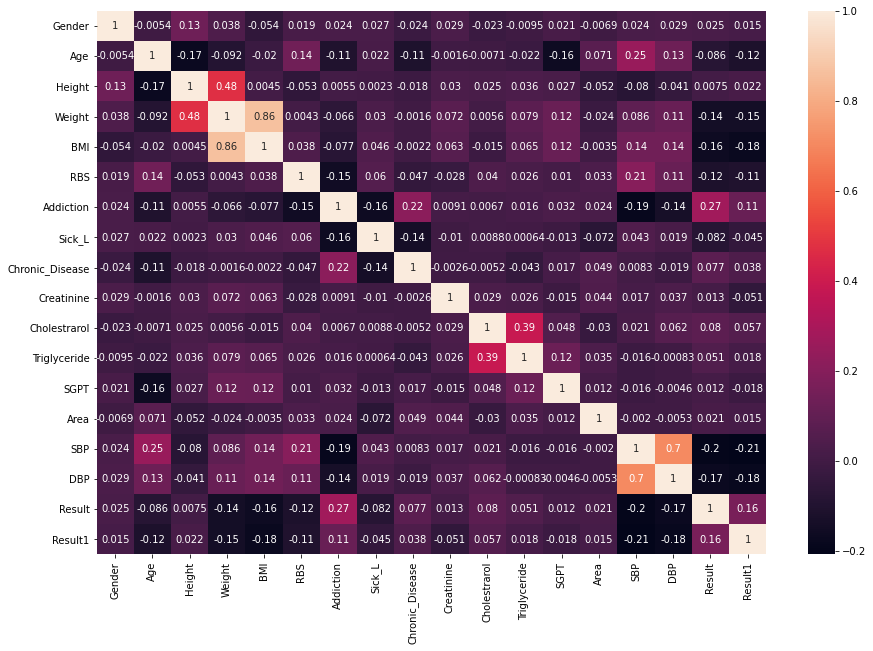

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [57]:
#we can remove Cholestrarol and SGPT by stduying the boxplot and heatmap

In [58]:
# df.drop(['Creatinine'],axis=1,inplace=True)

In [59]:
df.describe()

Gender          Age       Height       Weight          BMI  \
count  1768.000000  1768.000000  1717.000000  1768.000000  1768.000000   
mean      0.991516    48.703054   170.282469    71.266403    24.407879   
std       0.091744     7.357363     6.742258    11.105134     3.321995   
min       0.000000    24.000000   151.000000     0.000000     0.000000   
25%       1.000000    44.000000   165.000000    64.000000    22.400000   
50%       1.000000    50.000000   170.000000    70.000000    24.255000   
75%       1.000000    54.000000   175.000000    79.000000    26.260000   
max       1.000000    64.000000   190.000000   122.000000    44.810000   

               RBS    Addiction       Sick_L  Chronic_Disease   Creatinine  \
count  1768.000000  1768.000000  1766.000000      1768.000000  1768.000000   
mean    131.069005     0.883484     2.502265         0.936086     0.896821   
std      46.478830     0.320933     5.537689         0.244669     0.493935   
min      75.000000     0.000000     0.000000         0.000000     0.500000   
25%     104.000000     1.000000     0.000000         1.000000     0.800000   
50%     118.000000     1.000000     0.000000         1.000000     0.900000   
75%     140.000000     1.000000     3.000000         1.000000     0.900000   
max     510.000000     1.000000    62.000000         1.000000    21.000000   

       Cholestrarol  Triglyceride        SGPT         Area          SBP  \
count   1768.000000   1768.000000  1768.00000  1768.000000  1767.000000   
mean     164.596437    167.433824    32.11991    21.475679   130.791171   
std       27.793596     73.274477    16.02634    13.381921    18.323504   
min        0.600000     48.000000     7.00000     0.000000    90.000000   
25%      155.000000    137.750000    27.00000     7.000000   120.000000   
50%      163.000000    153.000000    29.00000    19.000000   130.000000   
75%      171.000000    173.000000    31.00000    37.000000   140.000000   
max      294.000000    651.000000   210.00000    39.000000   240.000000   

               DBP       Result      Result1  
count  1767.000000  1768.000000  1768.000000  
mean     82.804188     0.850113     0.861991  
std       8.492761     0.425077     0.392578  
min      50.000000     0.000000     0.000000  
25%      80.000000     1.000000     1.000000  
50%      80.000000     1.000000     1.000000  
75%      90.000000     1.000000     1.000000  
max     140.000000     2.000000     2.000000

In [60]:
df.isnull().values.any()

True

In [61]:
df.shape

(1768, 18)

In [62]:
df.isnull().sum().sum()

55

In [63]:
df['Height'] = df['Height'].fillna(value=df['Height'].median())

In [64]:
df.isnull().sum().sum()

4

In [65]:
df['Sick_L'] = df['Sick_L'].fillna(value=df['Sick_L'].median())

In [66]:
df.isnull().sum().sum()

2

In [67]:
df['SBP'] = df['SBP'].fillna(value=df['SBP'].median())
df['DBP'] = df['DBP'].fillna(value=df['DBP'].median())

In [68]:
df.isnull().sum().sum()

0

C:\Users\SHREYANSH VINIT\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

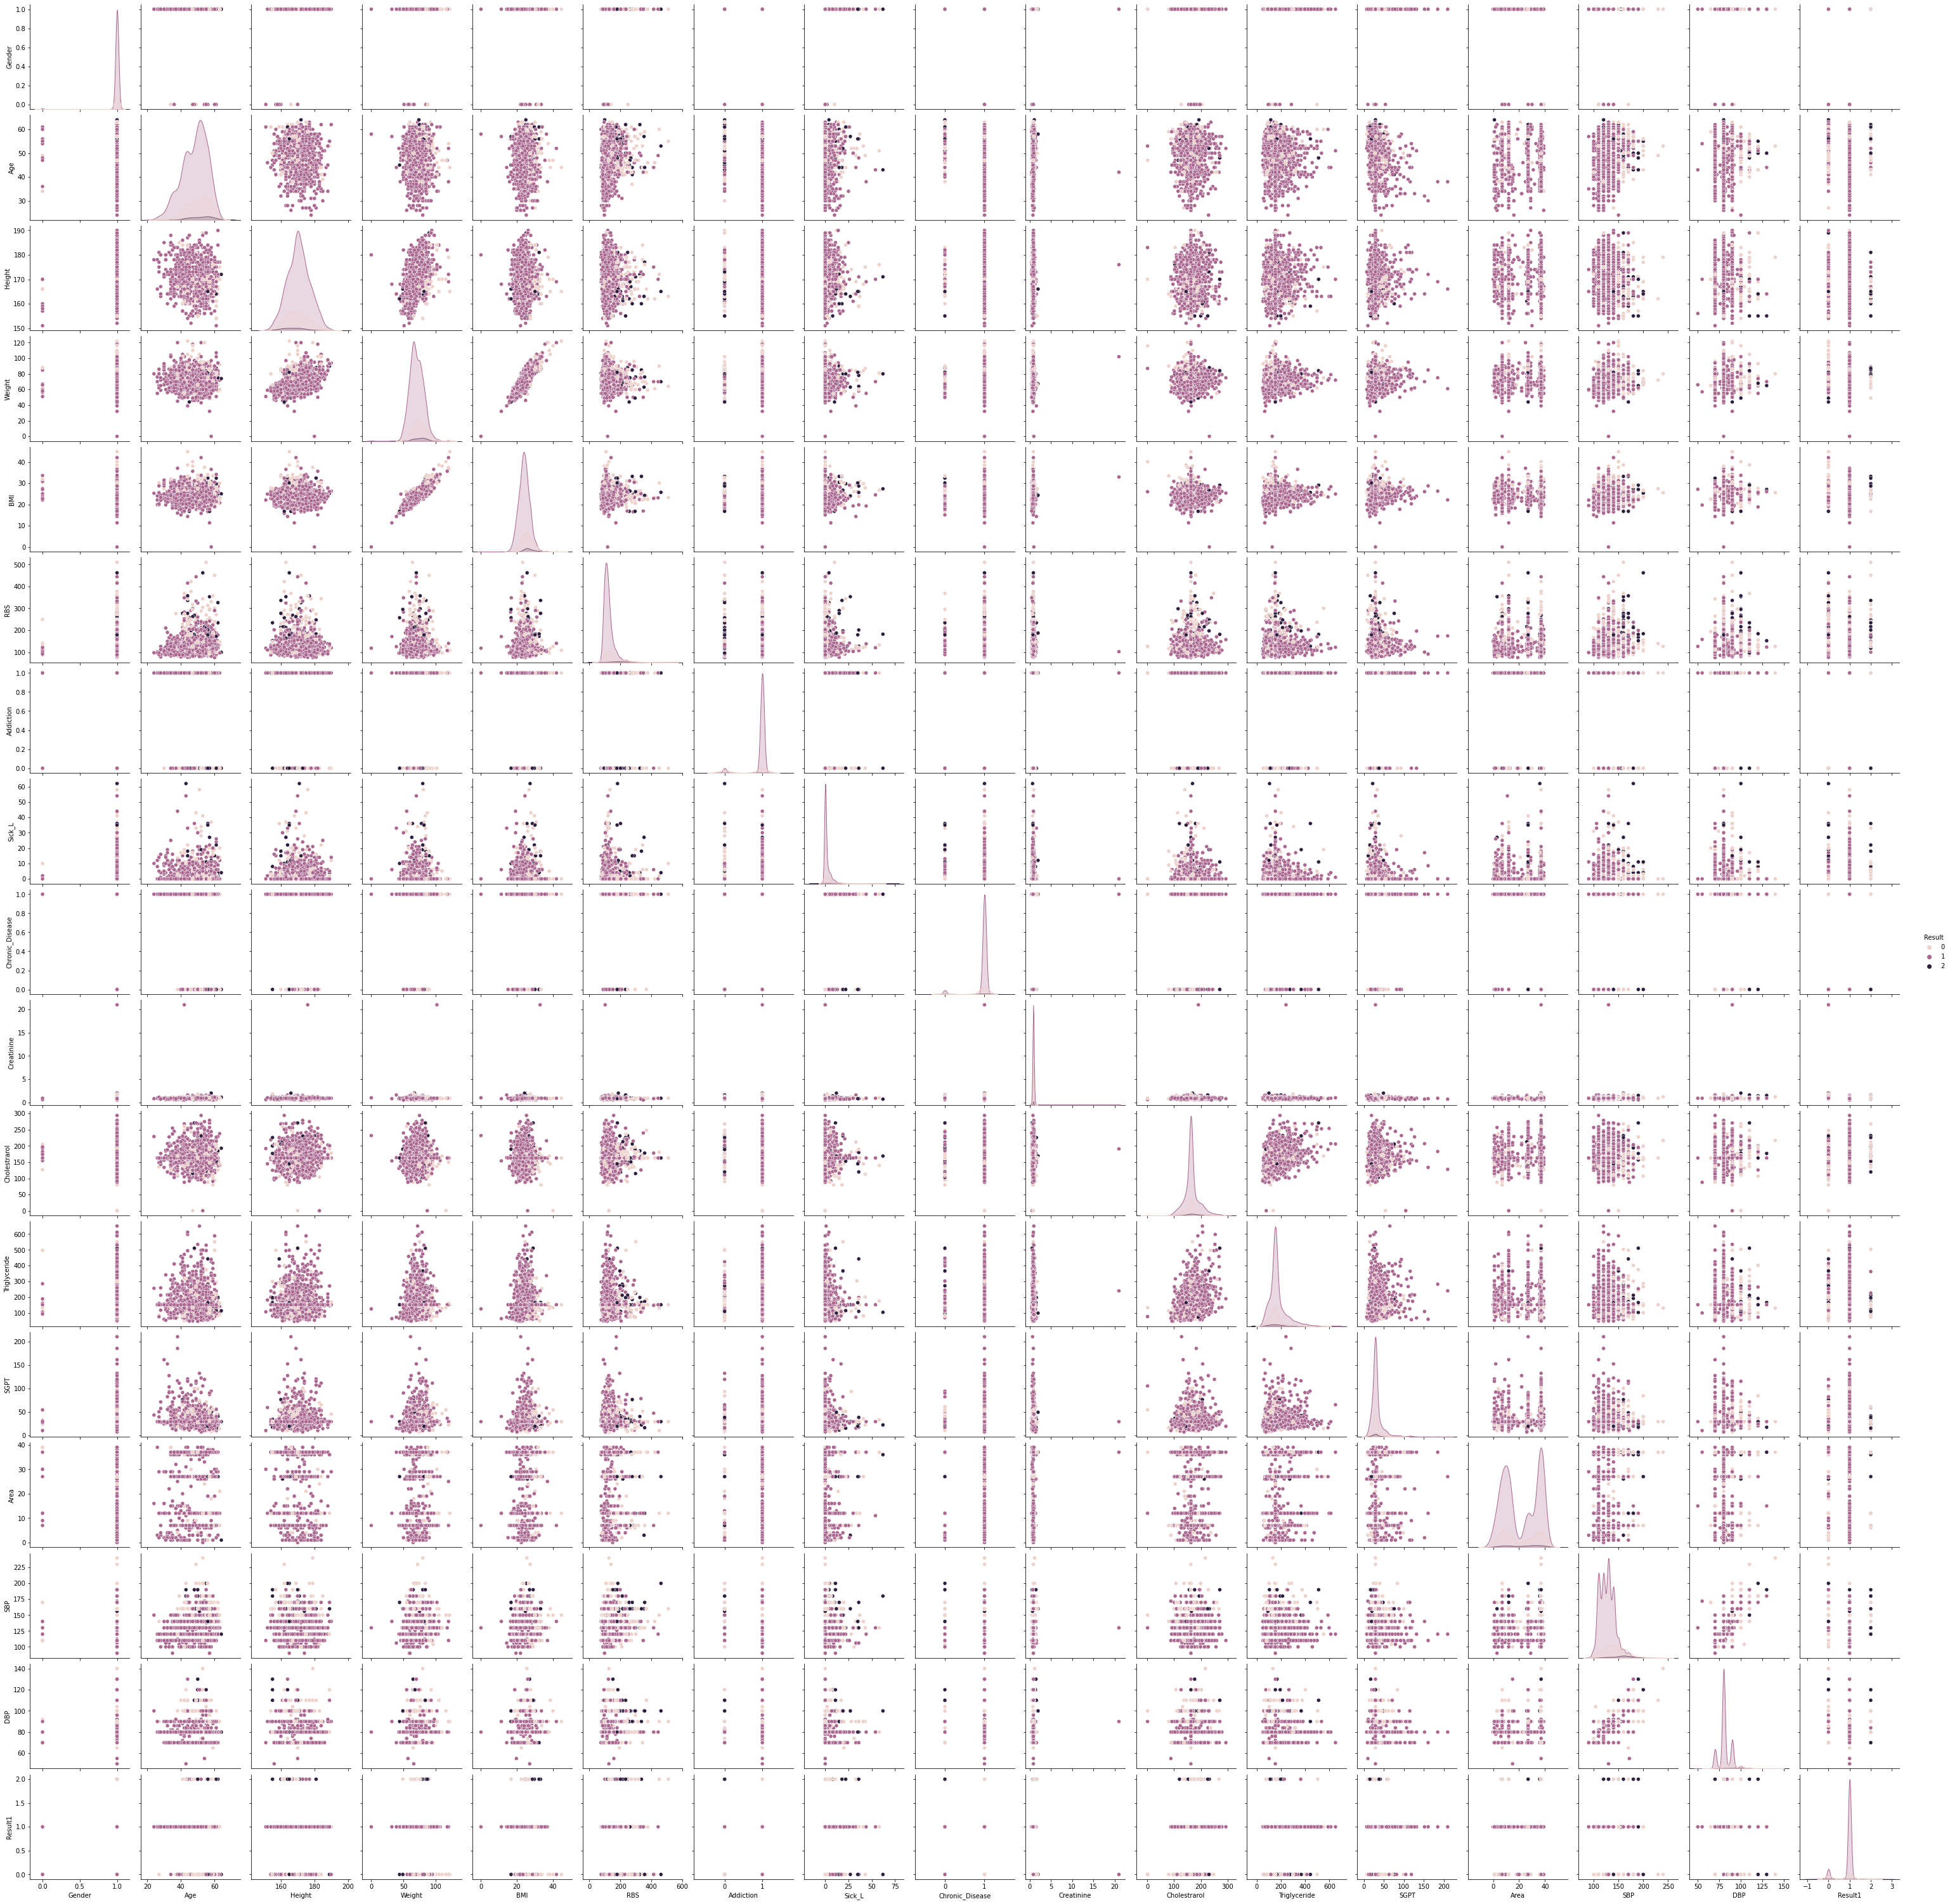

In [69]:
plt.figure(figsize=(20,20))
sns.pairplot(df , hue='Result' , diag_kind = 'kde')

<Figure size 1440x1440 with 0 Axes>

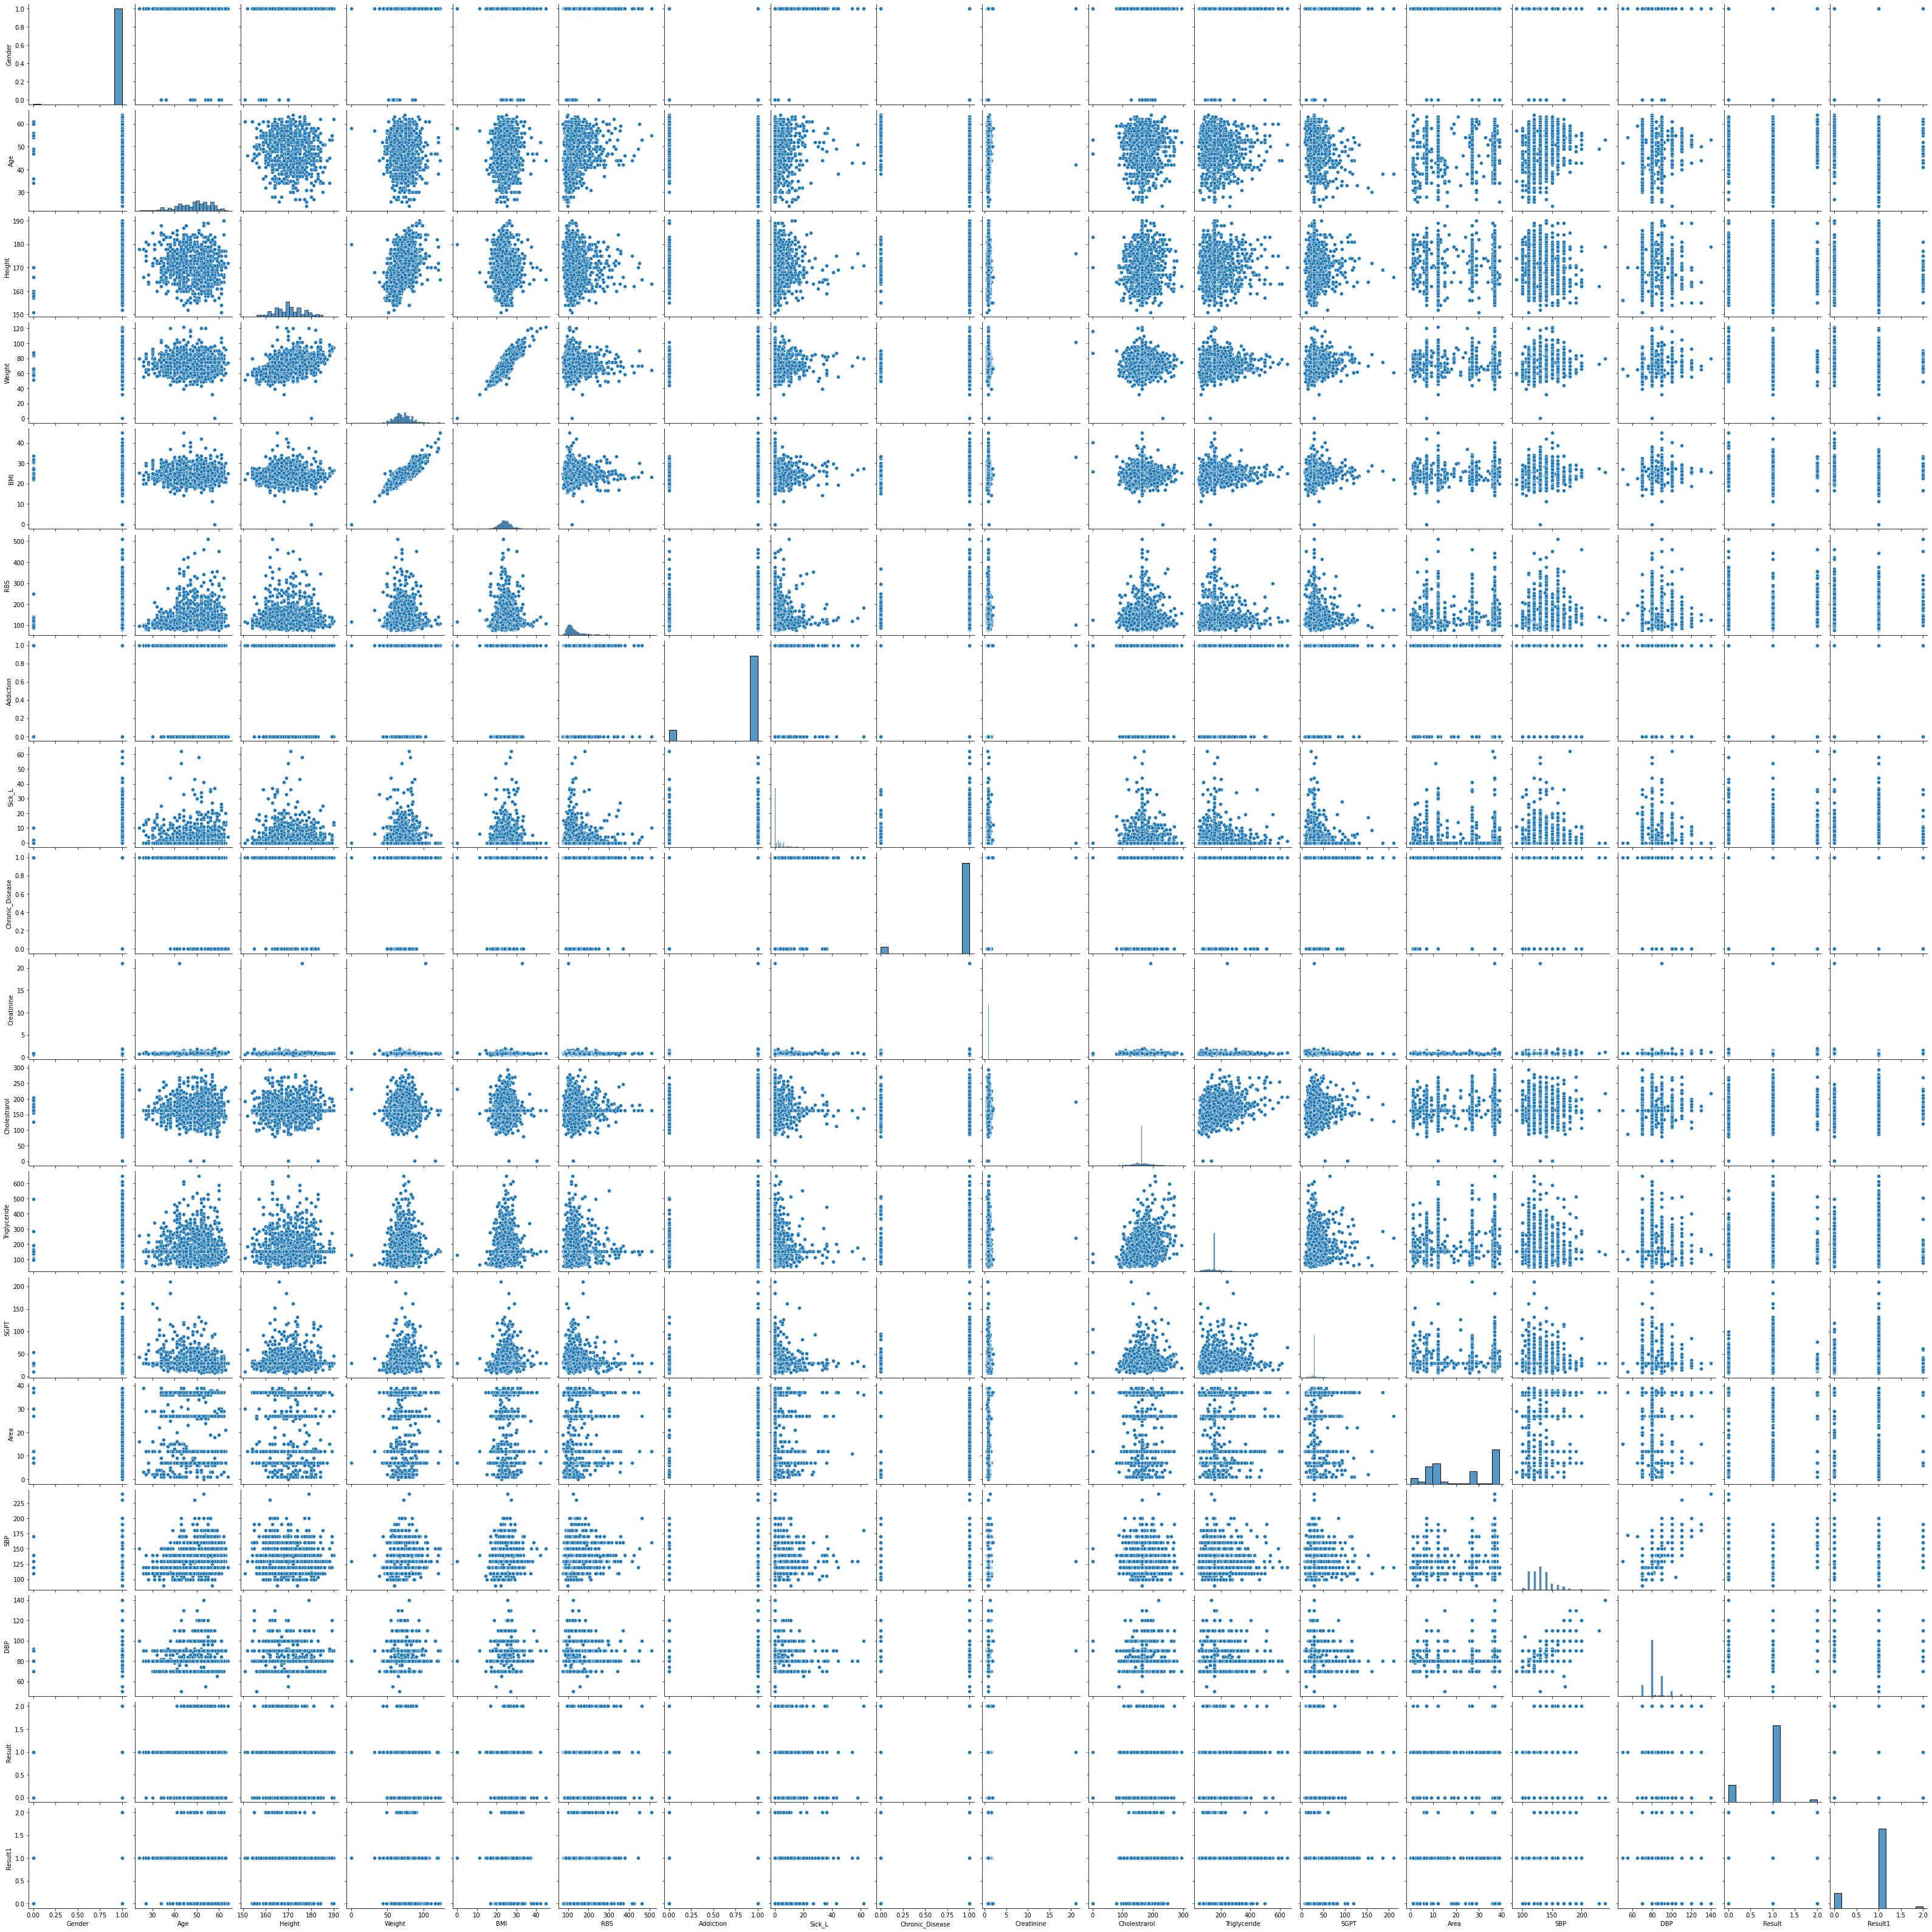

In [70]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

<AxesSubplot:xlabel='Addiction', ylabel='count'>

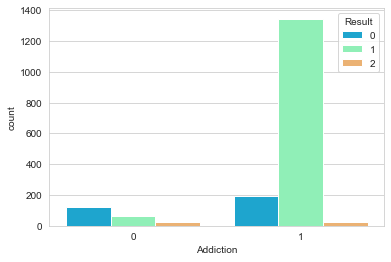

In [71]:
sns.set_style('whitegrid')
sns.countplot(x='Addiction',hue='Result',data=df,palette='rainbow')
#AverageHealth=0, BestHealth=1, PoorHealth=2
#addiction : yes=0, no=1

<AxesSubplot:xlabel='Chronic_Disease', ylabel='count'>

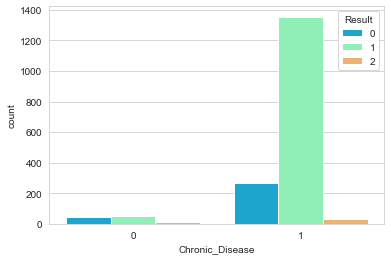

In [72]:
sns.set_style('whitegrid')
sns.countplot(x='Chronic_Disease',hue='Result',data=df,palette='rainbow')
#AverageHealth=0, BestHealth=1, PoorHealth=2
#Chronic_Disease: Yes=1,no=0

<AxesSubplot:xlabel='Gender', ylabel='count'>

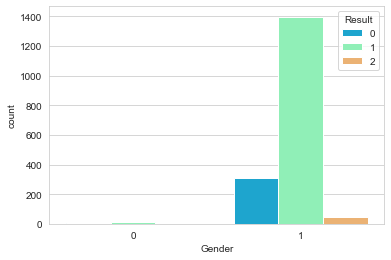

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Result',data=df,palette='rainbow')
#AverageHealth=0, BestHealth=1, PoorHealth=2
#MALE=0,FEMALE=1

C:\Users\SHREYANSH VINIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

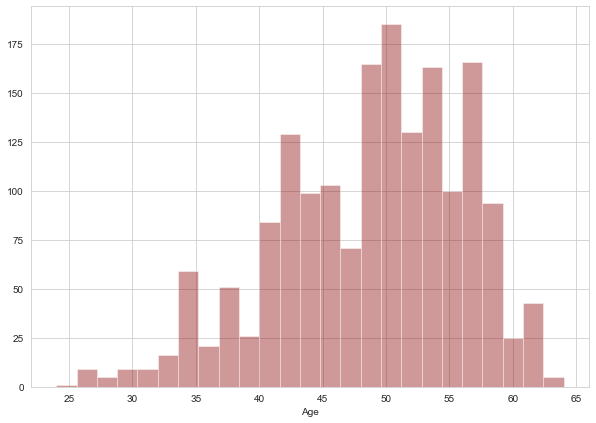

In [74]:
plt.figure(figsize=(10,7))
sns.distplot(df['Age'].dropna(),kde=False,color='darkred')

In [75]:
df.head()

Gender  Age  Height  Weight    BMI    RBS  Addiction  Sick_L  \
0       1   44   180.0      83  25.06   84.0          0     0.0   
1       1   43   169.0      72  25.21  116.0          1     4.0   
2       1   31   180.0      73  21.80   88.0          1     0.0   
3       1   33   172.0      75  25.35   93.0          1    10.0   
4       1   27   173.0      84  29.07  101.0          1    15.0   

   Chronic_Disease  Creatinine  Cholestrarol  Triglyceride  SGPT  Area    SBP  \
0                1         1.0         163.0         153.0  29.0    37  130.0   
1                1         1.0         218.0         153.0  29.0     7  170.0   
2                1         0.9         163.0         153.0  29.0     2  110.0   
3                1         0.9         162.0          69.0  54.0    12  110.0   
4                1         1.1         136.0          86.0  29.0     2  120.0   

     DBP  Result  Result1  
0   80.0       0        1  
1  110.0       1        0  
2   80.0       1        1  
3   70.0       1        1  
4   80.0       0        0

In [76]:
# df.drop(['Result'],axis=1,inplace=True)
df.drop(['Chronic_Disease'],axis=1,inplace=True)
df.drop(['Cholestrarol'],axis=1,inplace=True)
df.drop(['Triglyceride'],axis=1,inplace=True)
df.drop(['Area'],axis=1,inplace=True)

In [77]:
df.head()

Gender  Age  Height  Weight    BMI    RBS  Addiction  Sick_L  Creatinine  \
0       1   44   180.0      83  25.06   84.0          0     0.0         1.0   
1       1   43   169.0      72  25.21  116.0          1     4.0         1.0   
2       1   31   180.0      73  21.80   88.0          1     0.0         0.9   
3       1   33   172.0      75  25.35   93.0          1    10.0         0.9   
4       1   27   173.0      84  29.07  101.0          1    15.0         1.1   

   SGPT    SBP    DBP  Result  Result1  
0  29.0  130.0   80.0       0        1  
1  29.0  170.0  110.0       1        0  
2  29.0  110.0   80.0       1        1  
3  54.0  110.0   70.0       1        1  
4  29.0  120.0   80.0       0        0

In [78]:
X=df.iloc[:, :-1]
y=df.iloc[:,-1]

In [79]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
er = ExtraTreesRegressor()
er.fit(X,y)

ExtraTreesRegressor()

In [80]:
print(er.feature_importances_)

[0.00542256 0.08820883 0.09525667 0.09001114 0.11349269 0.12533795
 0.0302945  0.08747535 0.07774486 0.08203256 0.08268308 0.05546892
 0.0665709 ]


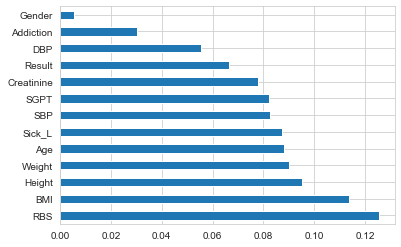

In [81]:
feat_importances = pd.Series(er.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [82]:
df.shape

(1768, 14)

In [83]:
df.head()

Gender  Age  Height  Weight    BMI    RBS  Addiction  Sick_L  Creatinine  \
0       1   44   180.0      83  25.06   84.0          0     0.0         1.0   
1       1   43   169.0      72  25.21  116.0          1     4.0         1.0   
2       1   31   180.0      73  21.80   88.0          1     0.0         0.9   
3       1   33   172.0      75  25.35   93.0          1    10.0         0.9   
4       1   27   173.0      84  29.07  101.0          1    15.0         1.1   

   SGPT    SBP    DBP  Result  Result1  
0  29.0  130.0   80.0       0        1  
1  29.0  170.0  110.0       1        0  
2  29.0  110.0   80.0       1        1  
3  54.0  110.0   70.0       1        1  
4  29.0  120.0   80.0       0        0

In [84]:
X=df.iloc[:, :-1].values
y=df.iloc[:,-1].values

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=41, stratify=df['Result1'])

In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [87]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',multi_class='multinomial',random_state=41)
lr.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=41)

In [88]:
y_pred=lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[ 19  36   0]
 [ 18 275   0]
 [  5   1   0]]


0.8305084745762712

In [90]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.452     0.345     0.392        55
           1      0.881     0.939     0.909       293
           2      0.000     0.000     0.000         6

    accuracy                          0.831       354
   macro avg      0.445     0.428     0.434       354
weighted avg      0.800     0.831     0.813       354



C:\Users\SHREYANSH VINIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHREYANSH VINIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SHREYANSH VINIT\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
print('Training set score: {:.4f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lr.score(X_test, y_test)))

Training set score: 0.8359
Test set score: 0.8305


In [90]:
print(lr.predict(sc.transform([[1,32,180,85,26.2,180,1,2,1,160,165,20,30,131,79]])))

ValueError: X has 15 features, but StandardScaler is expecting 14 features as input.

In [94]:
import pickle
# open a file, where you want to store the data
file = open('hlr_model.pkl', 'wb')

# dump information to that file
pickle.dump(lr, file)